🎨 НАЧИНАЕМ РИСОВАТЬ ГРАФИКИ...
⏳ Загружаем данные...
✅ Данные готовы.
⏳ Загружаем модель...
✅ Модель загружена.

📊 Строим ROC-кривую...


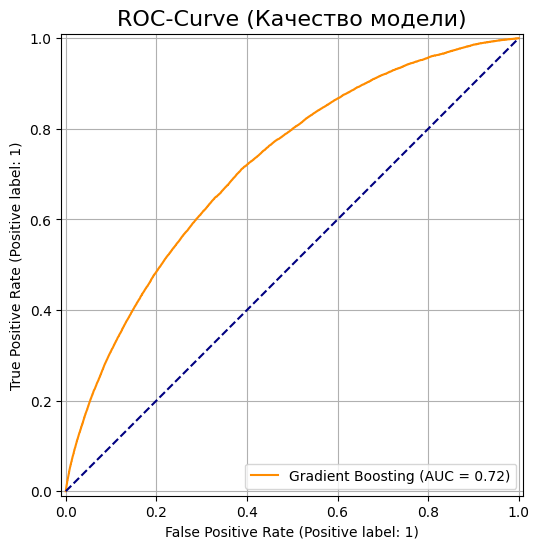

🏆 ТОЧНЫЙ ROC-AUC: 0.71968

📊 Строим Матрицу Ошибок...


<Figure size 800x800 with 0 Axes>

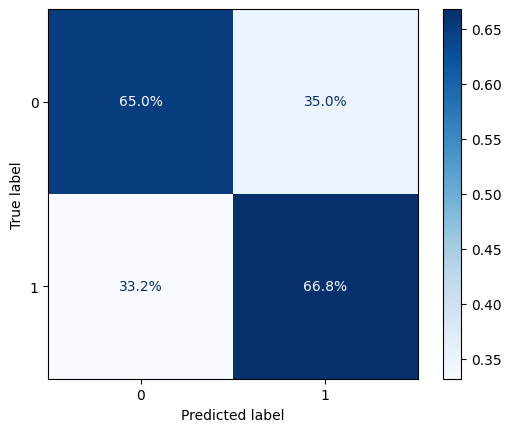

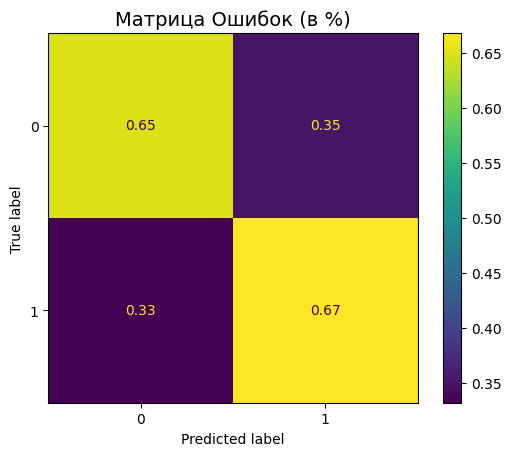

🎉 Готово! Делайте скриншоты этих картинок для презентации.


In [2]:
import os
# Говорим Питону: "Не ищи ядра сам, используй 4 штуки"
os.environ['LOKY_MAX_CPU_COUNT'] = '4'
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, roc_auc_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore') # <-- Эта команда прячет предупреждения

# ... дальше ваш код рисования ...

print("🎨 НАЧИНАЕМ РИСОВАТЬ ГРАФИКИ...")

# 1. ЗАГРУЖАЕМ ДАННЫЕ (Те же, что и при обучении)
# Нам нужно восстановить X_test и y_test, чтобы проверить модель
print("⏳ Загружаем данные...")
df_features = pd.read_parquet('features_pro.parquet')
df_target = pd.read_csv('train_target.csv')

# Объединяем
df = df_features.merge(df_target, on='id')
X = df.drop(columns=['flag', 'id'])
y = df['flag']

# Делим так же, как делили при обучении (random_state=42 - это важно!)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("✅ Данные готовы.")

# 2. ЗАГРУЖАЕМ МОДЕЛЬ
print("⏳ Загружаем модель...")
with open('model_pro.pkl', 'rb') as file:
    pipe = pickle.load(file)
print("✅ Модель загружена.")

# --- ГРАФИК 1: ROC-CURVE (САМЫЙ ВАЖНЫЙ ДЛЯ ПРЕЗЕНТАЦИИ) ---
#  Требуется "Визуализация итогового графика по ROC-AUC"
print("\n📊 Строим ROC-кривую...")

plt.figure(figsize=(10, 6))
ax = plt.gca()

# Рисуем кривую
roc_display = RocCurveDisplay.from_estimator(
    pipe, 
    X_test, 
    y_test, 
    name="Gradient Boosting", 
    ax=ax,
    color='darkorange'
)

# Добавляем линию "случайного гадания" (пунктир)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('ROC-Curve (Качество модели)', fontsize=16)
plt.grid(True)
plt.show()

# Считаем точную цифру
preds = pipe.predict_proba(X_test)[:, 1]
score = roc_auc_score(y_test, preds)
print(f"🏆 ТОЧНЫЙ ROC-AUC: {score:.5f}")


# --- ГРАФИК 2: МАТРИЦА ОШИБОК (CONFUSION MATRIX) ---
# Показывает, сколько раз модель угадала, а сколько ошиблась
print("\n📊 Строим Матрицу Ошибок...")

plt.figure(figsize=(8, 8))
# normalize='true' покажет результаты в процентах, это понятнее для бизнеса
ConfusionMatrixDisplay.from_estimator(
    pipe, 
    X_test, 
    y_test, 
    normalize='true', 
    cmap='Blues',
    values_format='.1%'
).plot()

plt.title('Матрица Ошибок (в %)', fontsize=14)
plt.show()

print("🎉 Готово! Делайте скриншоты этих картинок для презентации.")